In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 
import os
import sys
from keras.models import load_model

Using TensorFlow backend.


In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data

def load_da_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    
def load_da_image2(image_path):
    import pydicom as dicom
    import matplotlib.pylab as plt

    ds = dicom.dcmread(image_path)
    
    print(ds)
    print(ds.pixel_array.shape)
    print(ds.pixel_array)
    
    noted_finding = ds[0x0008, 0x1030].value
    print(noted_finding)

    #plt.imshow(ds.pixel_array, cmap='bone')

    return ds.pixel_array, noted_finding #**well just return the array and display it outside of here
    
 
def check_dicom(filename): #*takes a filename
    # todo
    
    #     print('Load file {} ...'.format(filename))
    #     ds = pydicom.dcmread(filename)       
    #     img = ds.pixel_array
    ds = pydicom.dcmread(filename)
    mod = ds[0x0008, 0x0060].value
    b_part_examined = ds[0x0018, 0x0015].value
    patient_position = ds[0x0018, 0x5100].value
    acceptance = 1
    
    print("Modality: " + mod)
    print("Body Part Exmained: " + b_part_examined)
    print("Patient Position: " + patient_position)
    
    if patient_position != "AP" and patient_position != "PA":
        acceptance = 0
    
    if b_part_examined != "CHEST":
        acceptance = 0
    
    if mod != "DX":
        acceptance = 0
    
    img = ds.pixel_array
    
    if acceptance:
        print("Image Accepted")
        return 1
    
    if not acceptance:
        print("Image Rejected")
        return 0
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(np_image): 
    # todo
    #np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    print("SUCCESS: IMAGE PREPROCESSED")
    print(np_image.shape)
    return np_image
    #return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_good_model():
    # todo
    model = load_model('best_final_model68.h5')
    print("Loaded H5 Model Success")
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    
    return prediction 

In [3]:
import pandas as pd
df = pd.read_csv("Data_For_Exploration.csv")
pd.set_option("display.max.columns", None)
df.head(20)

,Unnamed: 0,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Pneumonia_or_Infiltration
0,0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,/data/images_001/images/00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,/data/images_001/images/00000001_001.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000001_002.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,/data/images_001/images/00000002_000.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,/data/images_001/images/00000003_000.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000003_001.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,/data/images_001/images/00000003_002.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN,/data/images_001/images/00000003_003.png,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
8,8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000003_004.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN,/data/images_001/images/00000003_005.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Distribution of Primary Diseases in IMAGES


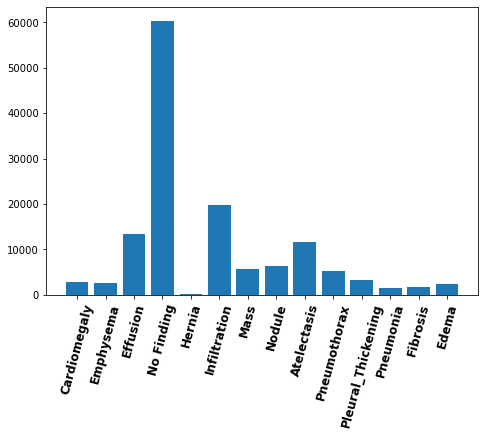

In [4]:
%matplotlib inline

print("Distribution of Primary Diseases in IMAGES")

findings_list = []
findings_list.append("Cardiomegaly")
findings_list.append("Emphysema")
findings_list.append("Effusion")
findings_list.append("No Finding")
findings_list.append("Hernia")
findings_list.append("Infiltration")
findings_list.append("Mass")
findings_list.append("Nodule")
findings_list.append("Atelectasis")
findings_list.append("Pneumothorax")
findings_list.append("Pleural_Thickening")
findings_list.append("Pneumonia")
findings_list.append("Fibrosis")
findings_list.append("Edema")

value_list = []

for idx in findings_list:
    temp = df[idx].value_counts()
    value_list.append(temp[1])
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
ax.bar(findings_list ,value_list)

plt.xticks(rotation=75, fontweight='bold', fontsize='12')

plt.show()

DISTRUBUTION of Pneumonia Positive XRAYS in dataset
Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive.


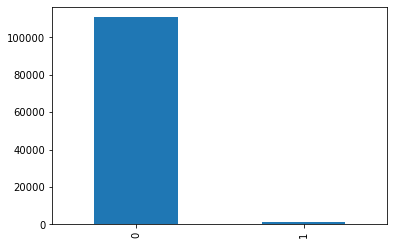

In [5]:
#%matplotlib inline

print("DISTRUBUTION of Pneumonia Positive XRAYS in dataset")

df['Pneumonia'].value_counts().plot(kind='bar')

#*Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays be only a fraction of them are Pneumonia positive."

my_text = "Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive."

print(my_text)

DISTRIBUTION of Lung Infiltration in data set


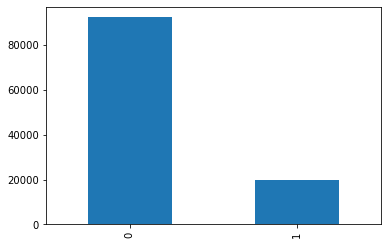

In [6]:
%matplotlib inline

print("DISTRIBUTION of Lung Infiltration in data set")

df['Infiltration'].value_counts().plot(kind='bar')

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40


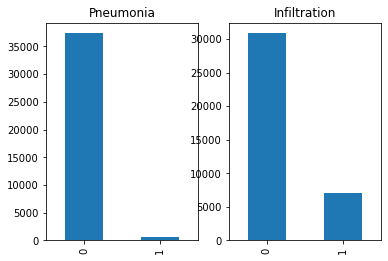

In [7]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40")

df_under_40 = df[(df['Patient Age'] >= 1) & (df['Patient Age'] <= 40)]

df.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_under_40[categorical_features]):
    df_under_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40


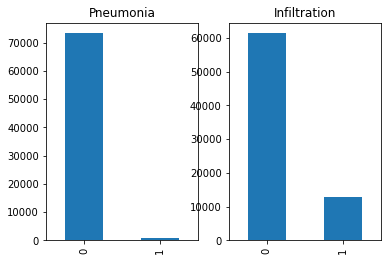

In [8]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

df_over_40 = df[(df['Patient Age'] > 40)]

df_over_40.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_over_40[categorical_features]):
    df_over_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


In [9]:
#**VERIFY THE DICOM , LOAD IT IF ITS GOOD TO GO. If its not good, we report dicom rejected and ignore it. 

from PIL import Image
import numpy as np
from skimage import transform

test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

image_data = []
image_finding = []

for idx in test_dicoms: #*filenames
    checked_out = 1 #*DICOM ok by defualt. But well check it next! 
    try:
        checked_out = check_dicom(idx) #**PER REVIEWER -- do not load image if dicom isnt good! 
    except Exception as e:
        print("Something Wrong with DICOM. Rejected!")
        checked_out = 0
    if checked_out == 0:
        print("------------------\n\n")
        print("DICOM WAS REJECTED: " + idx)
        print("------------------\n\n")
    else:
        print("DICOM ACCEPTED Loading DICOM: " + idx)
        image_d, finding = load_da_image2(idx)
        image_data.append(image_d)
        image_finding.append(finding)


Modality: DX
Body Part Exmained: CHEST
Patient Position: PA
Image Accepted
DICOM ACCEPTED Loading DICOM: test1.dcm
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patient ID                          LO: '2'
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '81'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 5100) Patient Position                    CS: 'PA'
(0020, 000d) Study Instance UID                  UI: 1.3.6.1.4.1.11129.5.5.112507010803284478207522016832191866964708
(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.11129.5.5.112630850362182468372440828755218293352329
(0028, 0002) Samples per Pixel 

XRAY FINDINGS
No Finding
Cardiomegaly
Effusion
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
Loaded H5 Model Success
Predict Image
[[0.6965685]]
Predict Image
[[0.79302573]]
Predict Image
[[0.7455704]]
My Trained model did not do well with these test images. According to the DICOMS none of them are pneumonia positive. But my model was giving a 70+ percent change of them being positive


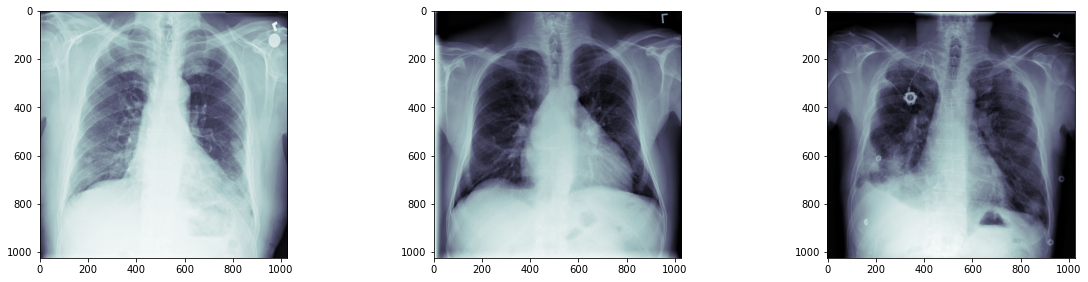

In [10]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

plt.figure(figsize=(20,10))
columns = len(image_data)

print("XRAY FINDINGS")
for idx in image_finding:
    print(idx)

for i, image in enumerate(image_data):
    plt.subplot(len(image_data) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='bone')

prepprocesses_images = []

for idx in image_data:     #**PRE PROCESS NON REJECTED IMAGES HERE! 
    prep_image = preprocess_image(idx)
    prepprocesses_images.append(prep_image)
    
model = load_good_model() #**well just load the model we already trained in the other notebook

for idx in prepprocesses_images:
    print("Predict Image")
    the_pred = model.predict(idx)
    print(the_pred)
    
print("My Trained model did not do well with these test images. According to the DICOMS none of them are pneumonia positive. But my model was giving a 70+ percent change of them being positive")